# Titanic Survival Prediction

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [156]:
df = pd.read_csv('train.csv', index_col= 'PassengerId')
df_test = pd.read_csv('test.csv',  index_col= 'PassengerId')

train_labels = df.index
test_labels = df_test.index

labels = df.loc[:, 'Survived']
df_train = df.drop('Survived', axis = 1, inplace= False)

all_data = pd.concat([df_train, df_test])

In [157]:
df_train.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [158]:
df_test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

## Feature Analysis

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Survived')

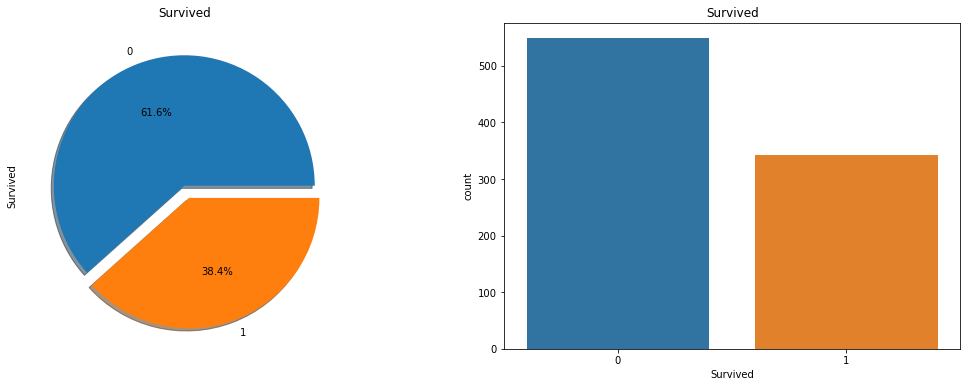

In [192]:
#urvival Analysis:
fig, ax = plt.subplots(1,2, figsize = (18,6))
df.Survived.value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_title('Survived')

sns.countplot('Survived', data = df, ax = ax[1])
ax[1].set_title('Survived')

### 'Sex' Feature

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


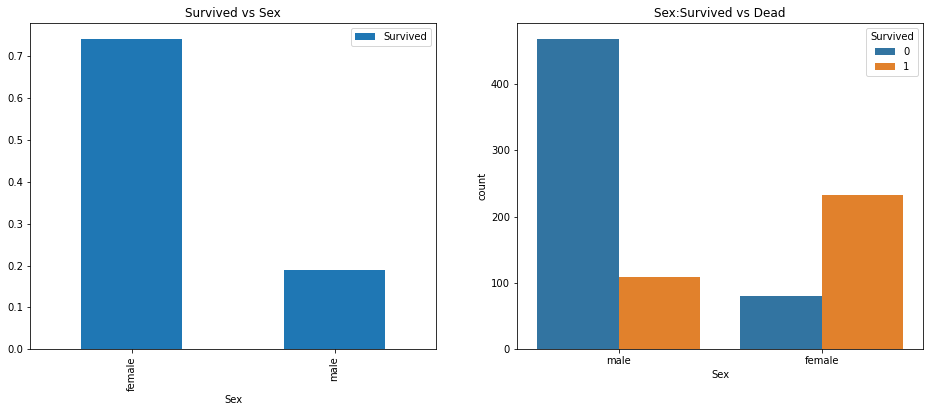

In [183]:

f,ax=plt.subplots(1,2,figsize=(16,6))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### 'Pclass' Feature

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


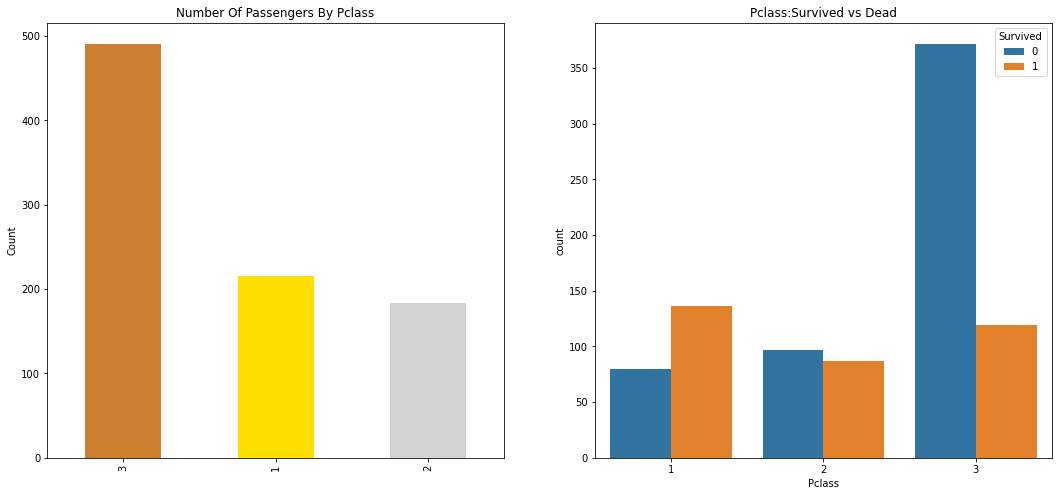

In [191]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### Potential Feature Engeneering

Cabin Evaluation

In [40]:
df_train['cabin_multiple'] = df_train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
df_train['cabin_adv'] = df_train.Cabin.apply(lambda x: str(x)[0])

In [41]:
df_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_multiple,cabin_adv
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,n
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,n
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,n
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,n


Ticket Types Evaluation

In [42]:
df_train['numeric_ticket'] = df_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df_train['ticket_letters'] = df_train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

Title Evaluation

In [43]:
df_train['name_title'] = df_train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

Fare

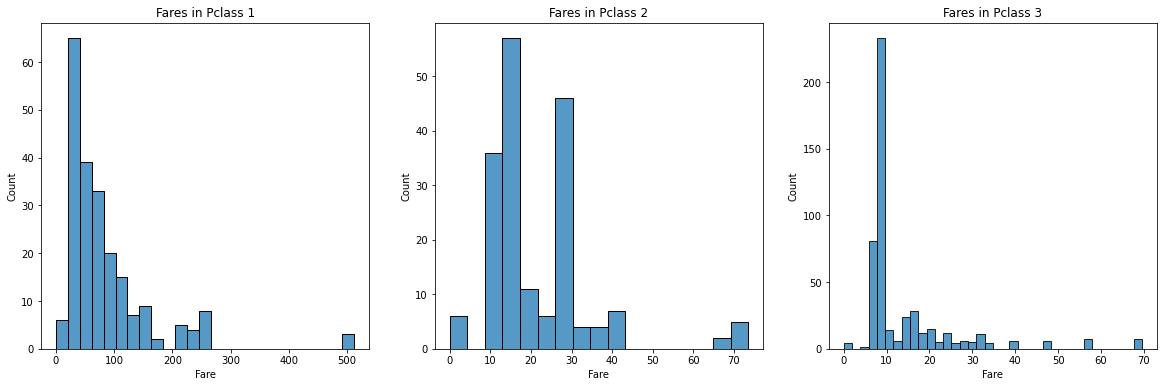

In [189]:
f,ax=plt.subplots(1,3,figsize=(20,6))
for n in range(3):
    sns.histplot(df[df['Pclass']==n+1].Fare,ax=ax[n])
    ax[n].set_title(f'Fares in Pclass {n+1}')

In [ ]:
all_data['norm_fare'] = np.log(all_data.Fare+1)

Looks like these methods give us valuable features, so we will use these methods for processeing on both the df_train and test set

Preprocess the Data

In [44]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

Handle Null Values

In [45]:
all_data.Age = all_data.Age.fillna(df_train.Age.mean())
all_data.Fare = all_data.Fare.fillna(df_train.Fare.mean())

#drop null 'embarked' rows. Only 2 instances of this in training and 0 in test 
all_data.Fare = all_data.Fare.fillna(df_train.Fare.mode())


In [46]:
all_data['norm_fare'] = np.log(all_data.Fare+1)

# converted fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

all_data.Pclass = all_data.Pclass.astype(str)
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])

In [146]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])

X_train = all_dummies_scaled.loc[train_labels]
df_prediction = all_dummies_scaled.loc[test_labels]

In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train, labels, test_size= 0.2, random_state= 42)

## Modeling

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

NaiveBayes-- Baseline model

In [116]:
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.65734266 0.72027972 0.75352113 0.76760563 0.67605634]
0.7149610952427854


Logistic Regression

In [129]:
parameters = {
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

lr = LogisticRegression(max_iter = 2000)
lr = GridSearchCV(lr, parameters, cv = 5)
lr.fit(x_train,y_train)
lr.score(x_test, y_test)

0.8100558659217877

In [128]:
knn = KNeighborsClassifier()
knn = GridSearchCV(knn, {'n_neighbors': np.arange(1,10), 'metric': ['minkowski', 'euclidean', 'chebyshev']}, cv = 5)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.8044692737430168

In [132]:
RandomForestClassifier()
rf = RandomForestClassifier(random_state = 1)
rf = GridSearchCV(rf, {'n_estimators': [100, 200, 300, 500, 1000], 'max_depth': [3, 4, 5,7,10] }, n_jobs = -1, cv = 3)
rf.fit(x_train,y_train)
rf_best = rf.best_estimator_

rf = RandomForestClassifier(**rf.best_params_, oob_score =True)
rf.fit(x_train, y_train)
print(f'oob_score : {rf.oob_score_}')
print(rf.score(x_test, y_test))


C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\sklearn\base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


oob_score : 0.824438202247191
0.8268156424581006


In [127]:
svc = SVC(probability = True)
param_grid =[{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
            'C': [.1, 1, 10, 100]},
            {'kernel': ['linear'], 'C': [.1, 1, 10, 100]}
            ]
svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
svc.fit(x_train,y_train)
svc.score(x_test, y_test)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


0.8100558659217877

In [135]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
xgb = GridSearchCV(xgb, {'n_estimators': [100, 300, 500, 1000,2000], 'max_depth': [3, 4, 5,7,10], }, n_jobs = -1, cv = 3)
xgb.fit(x_train,y_train)
xgb.score(x_test, y_test)

0.8268156424581006

In [138]:
##ensemble
from sklearn.ensemble import VotingClassifier

best_lr = lr.best_estimator_
best_knn = knn.best_estimator_
best_svc = svc.best_estimator_
best_rf = rf_best
best_xgb = xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('lr', best_lr)], voting = 'soft') 
voting_clf_xgb = VotingClassifier(estimators = [('knn',best_knn),('rf',best_rf),('svc',best_svc), ('xgb', best_xgb),('lr', best_lr)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,x_train,y_train,cv=5).mean())
voting_clf_hard.fit(x_train, y_train)
print('score on validation set: ', voting_clf_hard.score(x_test, y_test))

print('voting_clf_soft :',cross_val_score(voting_clf_soft,x_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,x_train,y_train,cv=5).mean())
voting_clf_soft.fit(x_train, y_train)

print('score on validation set: ', voting_clf_soft.score(x_test, y_test))

print('voting_clf_all :',cross_val_score(voting_clf_all,x_train,y_train,cv=5))
print('voting_clf_all mean :',cross_val_score(voting_clf_all,x_train,y_train,cv=5).mean())
voting_clf_all.fit(x_train, y_train)

print('score on validation set: ', voting_clf_all.score(x_test, y_test))

print('voting_clf_xgb :',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5))
print('voting_clf_xgb mean :',cross_val_score(voting_clf_xgb,x_train,y_train,cv=5).mean())
voting_clf_xgb.fit(x_train, y_train)
print('score on validation set: ', voting_clf_xgb.score(x_test, y_test))

voting_clf_hard : [0.82517483 0.85314685 0.83802817 0.82394366 0.85211268]
voting_clf_hard mean : 0.8384812370727864
score on validation set:  0.8268156424581006
voting_clf_soft : [0.84615385 0.85314685 0.82394366 0.82394366 0.84507042]
voting_clf_soft mean : 0.837043238451689
score on validation set:  0.8044692737430168
voting_clf_all : [0.83916084 0.85314685 0.82394366 0.81690141 0.83802817]
voting_clf_all mean : 0.8342361863488623
score on validation set:  0.8212290502793296
voting_clf_xgb : [0.83916084 0.83916084 0.82394366 0.82394366 0.85211268]
voting_clf_xgb mean : 0.8356643356643356
score on validation set:  0.8268156424581006


In [147]:
pred = voting_clf_xgb.predict(df_prediction)
sample = pd.read_csv('gender_submission.csv')
sample['Survived'] = pred
sample.set_index('PassengerId', inplace= True)
sample.to_csv('submission')